# Zadanie
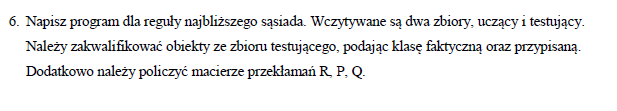

# Info

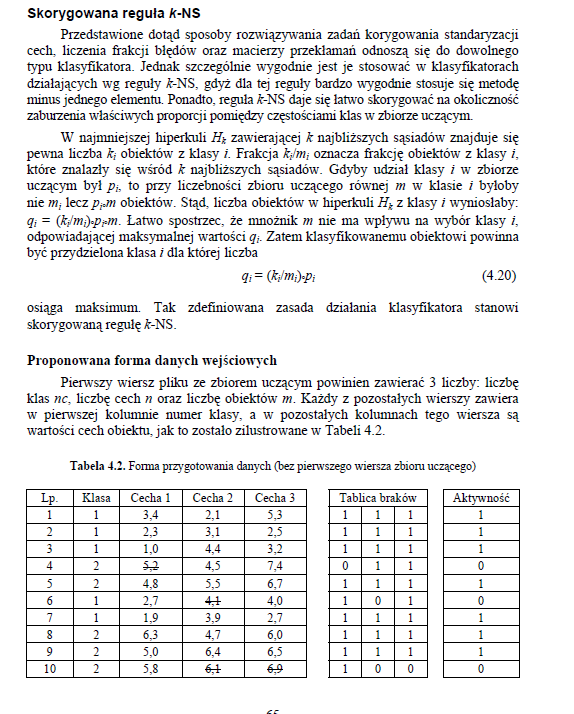

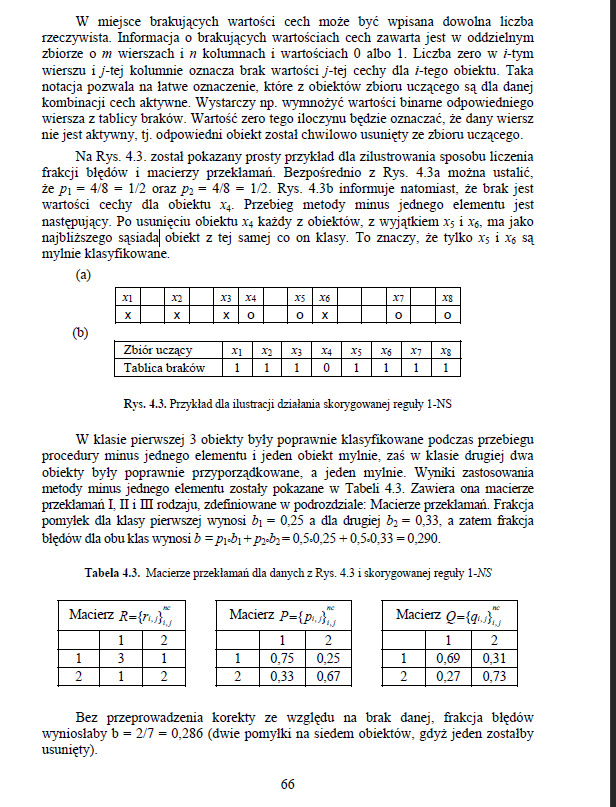

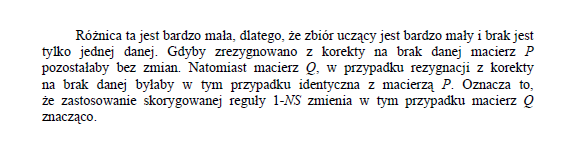


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_file_path = "../data/iris_trn.txt"
test_file_path = "../data/iris_tst.txt"

train_data = np.genfromtxt(train_file_path, delimiter="  ", skip_header=1, dtype=np.float128)
test_data = np.genfromtxt(test_file_path, delimiter="  ", skip_header=1, dtype=np.float128)
test_data

array([[1. , 5. , 3. , 1.6, 0.2],
       [1. , 5. , 3.4, 1.6, 0.4],
       [1. , 5.2, 3.5, 1.5, 0.2],
       [1. , 5.2, 3.4, 1.4, 0.2],
       [1. , 4.7, 3.2, 1.6, 0.2],
       [1. , 4.8, 3.1, 1.6, 0.2],
       [1. , 5.4, 3.4, 1.5, 0.4],
       [1. , 5.2, 4.1, 1.5, 0.1],
       [1. , 5.5, 4.2, 1.4, 0.2],
       [1. , 4.9, 3.1, 1.5, 0.2],
       [1. , 5. , 3.2, 1.2, 0.2],
       [1. , 5.5, 3.5, 1.3, 0.2],
       [1. , 4.9, 3.6, 1.4, 0.1],
       [1. , 4.4, 3. , 1.3, 0.2],
       [1. , 5.1, 3.4, 1.5, 0.2],
       [1. , 5. , 3.5, 1.3, 0.3],
       [1. , 4.5, 2.3, 1.3, 0.3],
       [1. , 4.4, 3.2, 1.3, 0.2],
       [1. , 5. , 3.5, 1.6, 0.6],
       [1. , 5.1, 3.8, 1.9, 0.4],
       [1. , 4.8, 3. , 1.4, 0.3],
       [1. , 5.1, 3.8, 1.6, 0.2],
       [1. , 4.6, 3.2, 1.4, 0.2],
       [1. , 5.3, 3.7, 1.5, 0.2],
       [1. , 5. , 3.3, 1.4, 0.2],
       [2. , 6.6, 3. , 4.4, 1.4],
       [2. , 6.8, 2.8, 4.8, 1.4],
       [2. , 6.7, 3. , 5. , 1.7],
       [2. , 6. , 2.9, 4.5, 1.5],
       [2. , 5

In [3]:
point = test_data[1]


In [4]:
def dist(point_a, point_b):
    return np.sqrt(np.sum((point_a - point_b) ** 2))

In [5]:
def dist_skip_firt_column(point_a, point_b):
    return dist(point_a[1:], point_b[1:])

In [6]:
sorted_train =  sorted(train_data, key=lambda x:dist_skip_firt_column(point,x))
for train_entry in sorted_train:
    print(f"Class: {train_entry[0]:<2} point {train_entry[1:]} distance {np.round(dist_skip_firt_column(train_entry,point),3)}" )

Class: 1.0 point [5.1 3.3 1.7 0.5] distance 0.2
Class: 1.0 point [5.  3.4 1.5 0.2] distance 0.224
Class: 1.0 point [5.1 3.5 1.4 0.3] distance 0.265
Class: 1.0 point [4.8 3.4 1.6 0.2] distance 0.283
Class: 1.0 point [5.1 3.5 1.4 0.2] distance 0.316
Class: 1.0 point [5.1 3.7 1.5 0.4] distance 0.332
Class: 1.0 point [5.  3.6 1.4 0.2] distance 0.346
Class: 1.0 point [4.8 3.4 1.9 0.2] distance 0.412
Class: 1.0 point [5.1 3.8 1.5 0.3] distance 0.436
Class: 1.0 point [4.9 3.1 1.5 0.1] distance 0.447
Class: 1.0 point [4.6 3.4 1.4 0.3] distance 0.458
Class: 1.0 point [5.4 3.4 1.7 0.2] distance 0.458
Class: 1.0 point [4.9 3.  1.4 0.2] distance 0.5
Class: 1.0 point [4.7 3.2 1.3 0.2] distance 0.51
Class: 1.0 point [5.4 3.7 1.5 0.2] distance 0.548
Class: 1.0 point [4.6 3.1 1.5 0.2] distance 0.548
Class: 1.0 point [4.8 3.  1.4 0.1] distance 0.574
Class: 1.0 point [5.4 3.9 1.7 0.4] distance 0.648
Class: 1.0 point [5.4 3.9 1.3 0.4] distance 0.707
Class: 1.0 point [4.6 3.6 1.  0.2] distance 0.775
Class

In [7]:
neighbour_count = 100
values, counts = np.unique(sorted_train[:neighbour_count], return_counts=True)

ind = np.argmax(counts)
values[ind]

3.0

In [8]:
def kns(neighbour_count, train_set):
    def func(test_point):
        sorted_train =  sorted(train_data, key=lambda x:dist_skip_firt_column(test_point,x))
        values, counts = np.unique(sorted_train[:neighbour_count], return_counts=True)
        ind = np.argmax(counts)
        return values[ind]
    return func

In [9]:
result = []
kns_classfier = kns(neighbour_count=5, train_set=train_data)
for test_point in test_data:
    result.append(kns_classfier(test_point))
result = np.array(result)
result

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 3., 2., 2., 2., 2., 2., 3.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3.,
       2., 2., 3., 3., 3., 3., 3., 2., 3., 3., 3., 3., 2., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3.], dtype=float128)

In [32]:
def compute_confusion_matrix(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)

    # calculate the confusion matrix; labels is numpy array of classification labels
    cm = np.zeros((len(actual), len(actual)))
    for a, p in zip(actual, predicted):
        cm[a][p] += 1
    return cm

In [33]:
compute_confusion_matrix(test_data[:,0], result)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [26]:
z = np.zeros([2,3])



In [27]:
z[1,1] +=1

In [30]:
test_data[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3.], dtype=float128)

NameError: name 'actual' is not defined